In [1]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [2]:
path = 'myData'
testRatio = 0.2
valRatio = 0.2
imageDimensions = (28, 28, 3)
batchSizeVal = 50
epochsVal = 10
stepsPerEpochVal = 2000

In [3]:
count = 0
images = []  # LIST CONTAINING ALL THE IMAGES
classNo = []  # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes .......")
for x in range(0, noOfClasses):
    myPicList = os.listdir(path + "/" + str(x))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(x) + "/" + y)
        curImg = cv2.resize(curImg, (28, 28))
        images.append(curImg)
        classNo.append(x)
    print(x, end=" ")
print(" ")
print("Total Images in Images List = ", len(images))
print("Total IDS in classNo List= ", len(classNo))

Total Classes Detected: 10
Importing Classes .......
0 1 2 3 4 5 6 7 8 9  
Total Images in Images List =  10160
Total IDS in classNo List=  10160


In [4]:
images = np.array(images)
classNo = np.array(classNo)
print(images.shape)

(10160, 28, 28, 3)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=valRatio)
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(6502, 28, 28, 3)
(2032, 28, 28, 3)
(1626, 28, 28, 3)


In [6]:
numOfSamples = []
for x in range(0, noOfClasses):
    numOfSamples.append(len(np.where(y_train == x)[0]))
print(numOfSamples)

[659, 649, 645, 661, 656, 663, 631, 663, 637, 638]


In [7]:
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    return img

In [8]:
X_train = np.array(list(map(preProcessing, X_train)))
X_test = np.array(list(map(preProcessing, X_test)))
X_validation = np.array(list(map(preProcessing, X_validation)))
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(6502, 28, 28)
(2032, 28, 28)
(1626, 28, 28)


In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(6502, 28, 28, 1)
(2032, 28, 28, 1)
(1626, 28, 28, 1)


In [10]:
y_train = to_categorical(y_train, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)

In [11]:
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (3, 3)
    sizeOfFilter2 = (3, 3)
    sizeOfPool = (2, 2)
    noOfNodes = 500

    model = keras.Sequential()
    model.add(keras.Input(shape=(28, 28, 1)))
    model.add(Conv2D(noOfFilters, kernel_size=sizeOfFilter1, activation="relu"))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Conv2D(64, kernel_size=sizeOfFilter2, activation='relu'))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(units=noOfClasses, activation='softmax'))

    # model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy']) # udpated the optimizer based on TA Jagadish inputs.
    opt = keras.optimizers.Adam(learning_rate=0.01) 
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [12]:
model = myModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 60)        600       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 60)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        34624     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [13]:
model.fit(X_train, y_train, batch_size=32, epochs=14, validation_split=0.1, shuffle=1)

Epoch 1/14
183/183 [==============================] - 39s 202ms/step - loss: 1.0033 - accuracy: 0.6727 - val_loss: 0.0863 - val_accuracy: 0.9662
Epoch 2/14
183/183 [==============================] - 30s 166ms/step - loss: 0.1545 - accuracy: 0.9484 - val_loss: 0.0755 - val_accuracy: 0.9724
Epoch 3/14
183/183 [==============================] - 35s 192ms/step - loss: 0.1117 - accuracy: 0.9619 - val_loss: 0.0577 - val_accuracy: 0.9846
Epoch 4/14
183/183 [==============================] - 37s 204ms/step - loss: 0.0931 - accuracy: 0.9698 - val_loss: 0.0493 - val_accuracy: 0.9816
Epoch 5/14
183/183 [==============================] - 35s 192ms/step - loss: 0.1080 - accuracy: 0.9653 - val_loss: 0.0654 - val_accuracy: 0.9754
Epoch 6/14
183/183 [==============================] - 34s 184ms/step - loss: 0.0986 - accuracy: 0.9683 - val_loss: 0.0538 - val_accuracy: 0.9816
Epoch 7/14
183/183 [==============================] - 34s 186ms/step - loss: 0.0900 - accuracy: 0.9714 - val_loss: 0.0509 - val_ac

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
y_predicted = model.predict(X_test)
print('Test Score = ', score[0])
print('Test Accuracy =', score[1])

Test Score =  0.04649050906300545
Test Accuracy = 0.9901574850082397


In [15]:
#### SAVE THE TRAINED MODEL
model.save('cnn_model_printed_digits_bt32_E14.h5')

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[8, 5, 7, 0, 8]

In [17]:
y_test_labels = [np.argmax(i) for i in y_test]
y_test_labels[:5]

[8, 5, 7, 0, 8]

In [18]:
cMatrix = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Actual')

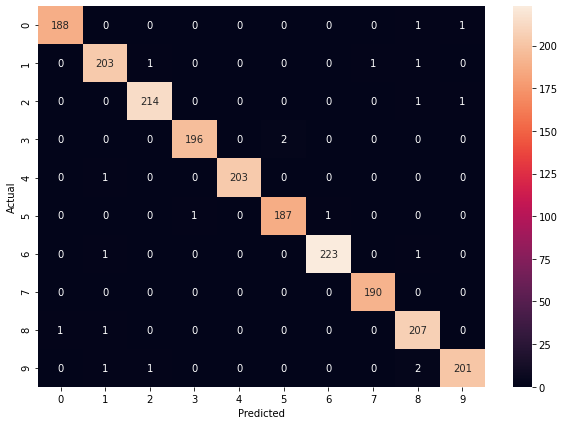

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')